## ImageNet
- project that labels/categorizes images based on defined set of words/phrases
- follows WordNet hierarchy where each word/phrase is called a synonym set (sysnet)
- ImageNet images are organized according to these synsets with ~1,000+ images per sysnet

## Pre-trained models
- VGG16
- VGG19
- ResNet50
- network architecture definitions^
- pre-trained weights?
- imagenet_utils: contains helper fucntions to prepare images for classification & obtain final class label prediction from network

In [1]:
#import the necessary packages
from keras.preprocessing import image as image_utils
from imagenet_utils import decode_predictions
from imagenet_utils import preprocess_input
from vgg16 import VGG16
import numpy as np
import cv2

import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt

%matplotlib inline

Using TensorFlow backend.


## Command line
this is for runing the python file and specifying the image file to classify via the terminal

In [2]:
# #construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
#                 help="path to the input image")
# args = vars(ap.parse_args())

## Load image via OpenCV
- keras also has helper functions to load images (but differences how the functions work)
so if you want to apply other OpenCv functions to images, load via cv2.imread (and again with keras helpers)
- workaround if experienced with manupulating numpy arrays and swapping channels(?)
- .load_img is a keras helper function that loads image from disk
- target size is 224x224 required for VGG16, VGG19, ResNet50 network
architectures
- after calling .load_img image is in PIL/Pillow format, so we need to apply .img_to_array to convert image into a numpy format

In [3]:
image = "images/test.jpg"

In [4]:
#load the original image via OpenCV so we can draw on it and display
#it to our screen later
orig = cv2.imread(image)

In [8]:
type(orig)

numpy.ndarray

In [5]:
#load the input image using the keras helper utility while ensuring
#that the image is resized to 224x224 pixels, the required input
#dimensions for the network -- then convert the PIL image to a numpy array
print("[INFO] loading and preprocessing image...")
image = image_utils.load_img(image, target_size=(224, 224))
image = image_utils.img_to_array(image)

[INFO] loading and preprocessing image...


In [6]:
type(image)

numpy.ndarray

In [7]:
image.shape

(224, 224, 3)

## Image Preprocessing
- when classifying images using deep learning & CNNs often send images thru network in "batches" for efficiency
- preprocess by subtracting mean RGB pixel intensity computed from the ImageNet dataset

In [9]:
#our image is now represented by a numpy array of shape (3, 224, 224)
#but we need to expand the dimensions to be (1, 3, 224, 224) so we can 
#pass it through the network -- we'll also preprocess the image by
#subtracting the mean RGB pixel intensity from the ImageNet dataset
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

In [10]:
image.shape

(1, 224, 224, 3)

## Load Keras network
- initialize VGG16 class
- use pre-trained ImageNet weights with model (weights="imagenet")
- first time you run Keras downloads/caches the architecture weights to your disc in ~/.keras/models
- subsequent runs will be faster (since the network weights are already downloaded) but 1st run will be quite slow due to the download process
- weights are fairly large HDF5 files (ie 553MB)
- once the network is actually loaded into memory, classification only takes ~1s 
- considerable overhead in loading/initializing a large CNN
- since images can be presented to network in batches, same classification time will hold for mulitple images

In [11]:
#load the VGG16 network
print("[INFO] loading network...")
model = VGG16(weights="imagenet")

[INFO] loading network...
K.image_dim_ordering: tf


## Classify
- predict class labels by making call to .predict method of model
- predictions are a numpy array with 1,000 entries (predicted probabilities associated with each class in the ImageNet dataset)
- calling decode_predictions on these predictions gives ImageNet unique ID of the label & text label

[INFO] classifying image...
ImageNet ID: n07873807, Label: pizza


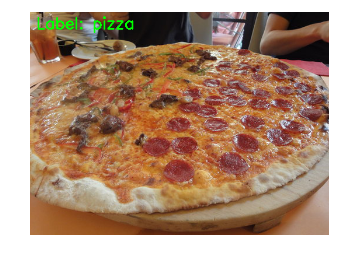

In [14]:
#classify the image
print ("[INFO] classifying image...")
preds = model.predict(image)
(inID, label) = decode_predictions(preds)[0]

#display the predictions to our screen
print ("ImageNet ID: {}, Label: {}".format(inID, label))
cv2.putText(orig, "Label: {}".format(label), (10,30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255,0),2)
#display image & label inline
plt.axis("off")
plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
plt.show()